In [1]:
import pandas as pd
data = pd.read_csv("movies _9thQuestion.csv")
display(data)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765,36851125,21240321.0,24000000.0,31-Oct-08,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084,83080084,20983030.0,85000000.0,2-Mar-07,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328,12506188,6679409.0,35000000.0,11-Aug-06,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336,141475336,NaN,80000000.0,28-Oct-05,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


# a) Find number of movies released under each genre in each year.


In [7]:
import pandas as pd
import numpy as np

#data['Release Date'] = pd.to_datetime(data['Release Date'],errors = 'coerce')
data['Release Year'] = data['Release Date'].dt.year

every = data.groupby(['Release Year', 'Major Genre']).size().reset_index(name='NO.OF MOVIES')

display(every)


,Release Year,Major Genre,NO.OF MOVIES
0,1929.0,Musical,1
1,1934.0,Romantic Comedy,1
2,1938.0,Drama,1
3,1939.0,Drama,1
4,1940.0,Drama,1
...,...,...,...
362,2071.0,Comedy,1
363,2071.0,Musical,1
364,2072.0,Comedy,1
365,2072.0,Drama,1


# b) Find movies with loss every year for each distributor.


In [22]:
data['Loss'] = pd.to_numeric(data['Worldwide Gross'],errors='coerce') - pd.to_numeric(data['Production Budget'],errors='coerce')
loss_movies = data[data['Loss'] < 0]
loss_movies_dist = loss_movies.groupby(['Release Year', 'Distributor','Title']).size().reset_index(name='Number of Movies with Loss')
display(loss_movies_dist)

,Release Year,Distributor,Title,Number of Movies with Loss
0,1976.0,20th Century Fox,The Blue Bird,1
1,1977.0,MGM,"New York, New York",1
2,1977.0,Sony Pictures,March or Die,1
3,1978.0,Universal,Caravans,1
4,1979.0,United Artists,The First Great Train Robbery,1
...,...,...,...,...
984,2065.0,MGM,The Greatest Story Ever Told,1
985,2065.0,Sony Pictures,Major Dundee,1
986,2068.0,Paramount Pictures,Barbarella,1
987,2069.0,Warner Bros.,The Wild Bunch,1


# c) Find the Directors who directed for each creative type with IMDB rating above 6.

In [5]:
data['IMDB Rating'] = pd.to_numeric(data['IMDB Rating'],errors='coerce')

rating = data[data['IMDB Rating']>6]

dir = data.groupby(['Director','Creative Type']).size().reset_index(name="no.of movies")

display(dir)

,Director,Creative Type,no.of movies
0,Abel Ferrara,Historical Fiction,1
1,Adam McKay,Contemporary Fiction,1
2,Adam McKay,Historical Fiction,1
3,Adam Shankman,Contemporary Fiction,5
4,Adam Shankman,Historical Fiction,1
...,...,...,...
919,Zach Braff,Contemporary Fiction,1
920,Zack Snyder,Historical Fiction,1
921,Zack Snyder,Science Fiction,1
922,Zack Snyder,Super Hero,1


# d)Draw the plot to compare the number of movies released till now by each director

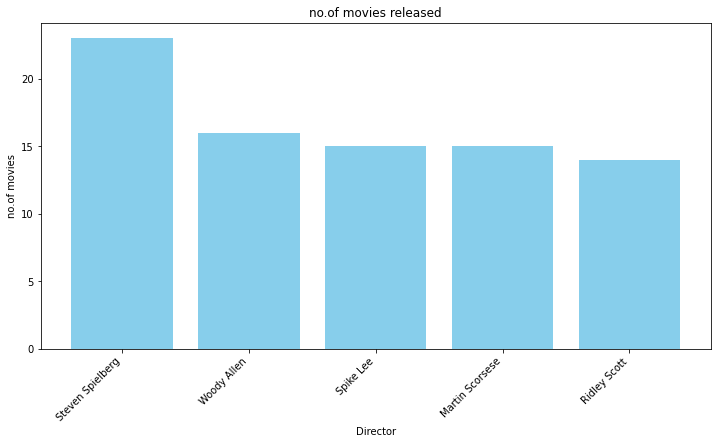

In [8]:
import matplotlib.pyplot as plt
dirs_movies = data.groupby('Director').size().reset_index(name="no.of movies")
dirs_movies = dirs_movies.sort_values(by='no.of movies',ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(dirs_movies.head(5)['Director'],dirs_movies.head(5)['no.of movies'],color='skyblue')
plt.xlabel('Director')
plt.ylabel('no.of movies')
plt.title('no.of movies released')
plt.xticks(rotation=45,ha='right')
plt.show()

# e) Find the genres of the movies released in each year in the ascending order.


In [18]:
genre=data.groupby(['Major Genre','Release Year']).size().reset_index(name="no.of movies")
genre = genre.sort_values(by=['Release Year','no.of movies'],ascending=[True,False])
display(genre)

,Major Genre,Release Year,no.of movies
258,Musical,1929.0,1
293,Romantic Comedy,1934.0,1
166,Drama,1938.0,1
167,Drama,1939.0,1
168,Drama,1940.0,1
...,...,...,...
146,Comedy,2071.0,1
292,Musical,2071.0,1
147,Comedy,2072.0,1
218,Drama,2072.0,1


# f)Find the budgets of the movies released by each distributor along with movie names.


In [19]:
movies_and_budgets = data.groupby('Distributor').agg({
    'Title': lambda x: list(x),
    'Production Budget': lambda x: list(x)
}).reset_index()
bud=movies_and_budgets[['Distributor', 'Title', 'Production Budget']]
display(bud)

,Distributor,Title,Production Budget
0,20th Century Fox,"[The Abyss, Alexander's Ragtime Band, Baby's D...","[70000000.0, 2000000.0, 50000000.0, 6000000.0,..."
1,3D Entertainment,"[Dolphins and Whales Tribes of the Ocean 3D, S...","[6000000.0, 5000000.0]"
2,8X Entertainment,[Megiddo: Omega Code 2],[22000000.0]
3,Access Motion Picture Group,[Dinner Rush],[2000000.0]
4,AdLab Films,[Krrish],[10000000.0]
...,...,...,...
169,Wolfe Releasing,[Show Me],[400000.0]
170,Women Make Movies,[Sisters in Law],[300000.0]
171,Yari Film Group Releasing,[The Illusionist],[16500000.0]
172,Yash Raj Films,"[Kabhi Alvida Naa Kehna, Neal n' Nikki, Rocket...","[10750000.0, 1300000.0, 1070000.0, 7000000.0, ..."


# g)Find the movies with the same IMDD rating but with different no.of IMDD rating

In [20]:

data['IMDB Rating'] = pd.to_numeric(data['IMDB Rating'], errors='coerce')

dup_ratings = data[data.duplicated(subset=['IMDB Rating'], keep=False)]
SIR_DNIR=dup_ratings[['Title', 'IMDB Rating', 'IMDB Votes']]

display(SIR_DNIR)


,Title,IMDB Rating,IMDB Votes
0,The Land Girls,6.1,1071.0
1,"First Love, Last Rites",6.9,207.0
2,I Married a Strange Person,6.8,865.0
3,Let's Talk About Sex,NaN,NaN
4,Slam,3.4,165.0
...,...,...,...
3196,Zack and Miri Make a Porno,7.0,55687.0
3197,Zodiac,NaN,NaN
3198,Zoom,3.4,7424.0
3199,The Legend of Zorro,5.7,21161.0


# h)Write a Pandas program to get those movies whose revenue more than 2 million and spent less than 1 million.


In [26]:
data['Worldwide Gross'] = pd.to_numeric(data['Worldwide Gross'], errors='coerce')
data['Production Budget'] = pd.to_numeric(data['Production Budget'], errors='coerce')

High_and_Low_movies = data[(data['Worldwide Gross'] > 2000000) & (data['Production Budget'] < 1000000)]
revenue = High_and_Low_movies[['Title', 'Worldwide Gross', 'Production Budget']]
display(revenue)

,Title,Worldwide Gross,Production Budget
14,Hollywood Shuffle,5228617.0,100000.0
15,Over the Hill to the Poorhouse,3000000.0,100000.0
26,"20,000 Leagues Under the Sea",8000000.0,200000.0
33,42nd Street,2300000.0,439000.0
54,American Graffiti,140000000.0,777000.0
...,...,...,...
2758,Super Size Me,29529368.0,65000.0
2847,The Station Agent,7773824.0,500000.0
2914,Tadpole,3200241.0,150000.0
3067,Raising Victor Vargas,2811439.0,800000.0


# i)Find the no. of movies in each genre under each source.

In [27]:
genre_source = data.groupby(['Source','Major Genre']).size().reset_index(name='no.of movies')
display(genre_source)

,Source,Major Genre,no.of movies
0,Based on Book/Short Story,Action,84
1,Based on Book/Short Story,Adventure,92
2,Based on Book/Short Story,Black Comedy,11
3,Based on Book/Short Story,Comedy,76
4,Based on Book/Short Story,Drama,260
...,...,...,...
84,Traditional/Legend/Fairytale,Adventure,6
85,Traditional/Legend/Fairytale,Comedy,3
86,Traditional/Legend/Fairytale,Drama,3
87,Traditional/Legend/Fairytale,Musical,1


# j) Find the no. of movies released in each decade

In [28]:
data['Decade'] = (data['Release Date'].dt.year // 10) * 10
movies_release_decade = data.groupby('Decade').size().reset_index(name='no.of Movies')
display(movies_release_decade)

,Decade,no.of Movies
0,1920.0,1
1,1930.0,6
2,1940.0,14
3,1950.0,8
4,1960.0,10
5,1970.0,76
6,1980.0,260
7,1990.0,769
8,2000.0,1830
9,2010.0,97


# k) Draw the plot showing the no. of movies released in each genre.


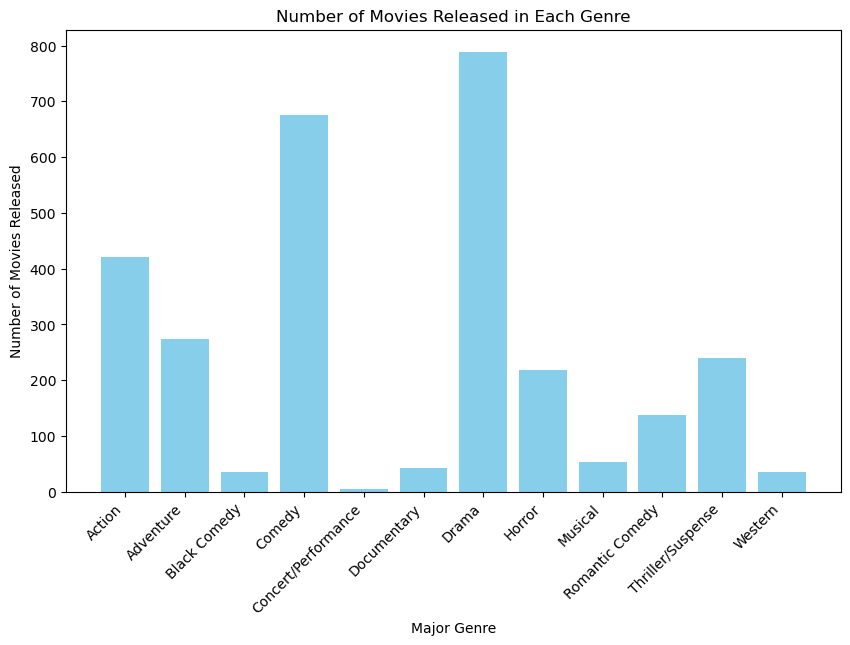

In [29]:
movies_release_genre = data.groupby('Major Genre').size().reset_index(name='no.of Movies')
plt.figure(figsize=(10, 6))
plt.bar(movies_release_genre['Major Genre'], movies_release_genre['no.of Movies'], color='skyblue')
plt.xlabel('Major Genre')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released in Each Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

# L) Show the no.of movies not rated under each genre in each fiction.

In [13]:
not_rated_counts = data[data['MPAA Rating'].isna()].groupby('Creative Type').size().reset_index(name="no.of movies")
print(not_rated_counts)

             Creative Type  no.of movies
0     Contemporary Fiction           123
1            Dramatization            20
2                  Factual             4
3                  Fantasy            75
4       Historical Fiction            67
5             Kids Fiction             1
6  Multiple Creative Types             1
7          Science Fiction            61
8               Super Hero             4
